In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv('training_tweets.csv')

In [3]:
train

url  \
0      https://twitter.com/yeeurin/status/13911746716...   
1      https://twitter.com/ThatOlSwain/status/1391163...   
2      https://twitter.com/DKGuyII1/status/1391161857...   
3      https://twitter.com/ElGranSenglar/status/13911...   
4      https://twitter.com/_ramboner_/status/13911510...   
...                                                  ...   
29995  https://twitter.com/martinas013/status/1238580...   
29996  https://twitter.com/KingKuma_x/status/12385629...   
29997  https://twitter.com/GreenBiz/status/1238559707...   
29998  https://twitter.com/host24_space/status/123855...   
29999  https://twitter.com/genadamedia/status/1238556...   

                date_and_time  \
0      2021-05-08 19:34:23-04   
1      2021-05-08 18:51:21-04   
2      2021-05-08 18:43:28-04   
3      2021-05-08 18:15:24-04   
4      2021-05-08 18:00:35-04   
...                       ...   
29995  2020-03-13 17:41:24-04   
29996  2020-03-13 16:29:58-04   
29997  2020-03-13 16:17:00-04   
29998  2020-03-13 16:06:51-04   
29999  2020-03-13 16:04:47-04   

                                                   tweet             tweet_id  \
0      @hoontyp3 we might stop by burger king to get ...  1391174671631097859   
1      A few recent dishes that turned out great but ...  1391163841669644293   
2      @TaureanReign that WC Impossible burger is an ...  1391161857730392070   
3      Stop whining and just have an impossible burge...  1391154795432525824   
4      all because we wanted an impossible burger htt...  1391151065551286273   
...                                                  ...                  ...   
29995  📌 Impossible Burger, la hamburguesa sin carne ...  1238580949983670282   
29996  Just copped the impossible burger let’s go veg...  1238562972903051266   
29997  According to independent reviewers, production...  1238559707612274688   
29998  Blind Taste Test with Fake Meat: Can Trader Jo...  1238557154543632385   
29999  Video: Blind Taste Test with Fake Meat: Can Tr...  1238556634303135745   

       reply_count  retweet_count  like_count  quote_count lang  negative  \
0                1              0           1            0   en     0.155   
1                5              1          75            0   en     0.000   
2                0              0           0            0   en     0.000   
3                0              0           3            0   en     0.100   
4                0              0           2            0   en     0.000   
...            ...            ...         ...          ...  ...       ...   
29995            0              0           0            0   ca     0.231   
29996            1              0           4            0   en     0.000   
29997            0              2           4            1   en     0.000   
29998            0              0           0            0   en     0.266   
29999            0              0           0            0   en     0.266   

       neutral  positive  compound  
0        0.845     0.000   -0.2960  
1        0.911     0.089    0.3716  
2        1.000     0.000    0.0000  
3        0.831     0.068   -0.0772  
4        1.000     0.000    0.0000  
...        ...       ...       ...  
29995    0.769     0.000   -0.5574  
29996    1.000     0.000    0.0000  
29997    0.909     0.091    0.2732  
29998    0.734     0.000   -0.7003  
29999    0.734     0.000   -0.7003  

[30000 rows x 13 columns]

In [4]:
train_original=train.copy()

In [17]:
test = pd.read_csv('test_tweets.csv', skiprows=range(1, 30001))

In [18]:
test

url  \
0     https://twitter.com/ErictheW/status/1238554893...   
1     https://twitter.com/Al_Volar/status/1238551462...   
2     https://twitter.com/mvachhani7/status/12385303...   
3     https://twitter.com/Zbeckers/status/1238549970...   
4     https://twitter.com/ExploreAlterra/status/1238...   
...                                                 ...   
9995  https://twitter.com/oh_theogony/status/1212010...   
9996  https://twitter.com/Mar_de_datos/status/121201...   
9997  https://twitter.com/coilingoracle/status/12120...   
9998  https://twitter.com/sophiatseliem/status/12120...   
9999  https://twitter.com/nighthawk1024/status/12120...   

               date_and_time  \
0     2020-03-13 15:57:52-04   
1     2020-03-13 15:44:14-04   
2     2020-03-13 14:20:32-04   
3     2020-03-13 15:38:18-04   
4     2020-03-13 15:37:37-04   
...                      ...   
9995  2019-12-31 08:59:25-05   
9996  2019-12-31 08:59:22-05   
9997  2019-12-31 08:58:25-05   
9998  2019-12-31 08:52:22-05   
9999  2019-12-31 08:30:04-05   

                                                  tweet             tweet_id  \
0     @WhittingtonCJ That’s what I call an impossibl...  1238554893696348161   
1     📌 Impossible Burger, la hamburguesa sin carne ...  1238551462730502145   
2     @earthforlife Girl try the impossible burger I...  1238530398617034754   
3     It’s Friday so no meat. I tired the #Impossibl...  1238549970539683843   
4     @samrutherford \nIf impossible burger is $8.99...  1238549796715032576   
...                                                 ...                  ...   
9995  @coilingoracle @MaybeItsMabel one Impossible B...  1212010371000786944   
9996  📌 Impossible Burger, la hamburguesa sin carne ...  1212010359109885953   
9997  @oh_theogony @MaybeItsMabel Lucien we could (r...  1212010121083150337   
9998  “PLANT BASED!”  IT’S LIKE THE IMPOSSIBLE BURGE...  1212008597850165249   
9999  Doctor Warns 'Impossible Burger' Has 18 Millio...  1212002984131006464   

      reply_count  retweet_count  like_count  quote_count lang  
0               0              0           0            0   en  
1               0              0           0            0   ca  
2               1              0           0            0   en  
3               0              0           0            0   en  
4               1              0           0            0   en  
...           ...            ...         ...          ...  ...  
9995            1              0           2            0   en  
9996            0              0           0            0   ca  
9997            1              0           4            0   en  
9998            0              1           0            0   en  
9999            0              0           0            0   en  

[10000 rows x 9 columns]

In [19]:
test_original=test.copy()

In [21]:
test_original.to_csv('test_tweets.csv', index=False)

In [24]:
combine = train.append(test,ignore_index=True)

In [25]:
combine

url  \
0      https://twitter.com/yeeurin/status/13911746716...   
1      https://twitter.com/ThatOlSwain/status/1391163...   
2      https://twitter.com/DKGuyII1/status/1391161857...   
3      https://twitter.com/ElGranSenglar/status/13911...   
4      https://twitter.com/_ramboner_/status/13911510...   
...                                                  ...   
39995  https://twitter.com/oh_theogony/status/1212010...   
39996  https://twitter.com/Mar_de_datos/status/121201...   
39997  https://twitter.com/coilingoracle/status/12120...   
39998  https://twitter.com/sophiatseliem/status/12120...   
39999  https://twitter.com/nighthawk1024/status/12120...   

                date_and_time  \
0      2021-05-08 19:34:23-04   
1      2021-05-08 18:51:21-04   
2      2021-05-08 18:43:28-04   
3      2021-05-08 18:15:24-04   
4      2021-05-08 18:00:35-04   
...                       ...   
39995  2019-12-31 08:59:25-05   
39996  2019-12-31 08:59:22-05   
39997  2019-12-31 08:58:25-05   
39998  2019-12-31 08:52:22-05   
39999  2019-12-31 08:30:04-05   

                                                   tweet             tweet_id  \
0      @hoontyp3 we might stop by burger king to get ...  1391174671631097859   
1      A few recent dishes that turned out great but ...  1391163841669644293   
2      @TaureanReign that WC Impossible burger is an ...  1391161857730392070   
3      Stop whining and just have an impossible burge...  1391154795432525824   
4      all because we wanted an impossible burger htt...  1391151065551286273   
...                                                  ...                  ...   
39995  @coilingoracle @MaybeItsMabel one Impossible B...  1212010371000786944   
39996  📌 Impossible Burger, la hamburguesa sin carne ...  1212010359109885953   
39997  @oh_theogony @MaybeItsMabel Lucien we could (r...  1212010121083150337   
39998  “PLANT BASED!”  IT’S LIKE THE IMPOSSIBLE BURGE...  1212008597850165249   
39999  Doctor Warns 'Impossible Burger' Has 18 Millio...  1212002984131006464   

       reply_count  retweet_count  like_count  quote_count lang  negative  \
0                1              0           1            0   en     0.155   
1                5              1          75            0   en     0.000   
2                0              0           0            0   en     0.000   
3                0              0           3            0   en     0.100   
4                0              0           2            0   en     0.000   
...            ...            ...         ...          ...  ...       ...   
39995            1              0           2            0   en       NaN   
39996            0              0           0            0   ca       NaN   
39997            1              0           4            0   en       NaN   
39998            0              1           0            0   en       NaN   
39999            0              0           0            0   en       NaN   

       neutral  positive  compound  
0        0.845     0.000   -0.2960  
1        0.911     0.089    0.3716  
2        1.000     0.000    0.0000  
3        0.831     0.068   -0.0772  
4        1.000     0.000    0.0000  
...        ...       ...       ...  
39995      NaN       NaN       NaN  
39996      NaN       NaN       NaN  
39997      NaN       NaN       NaN  
39998      NaN       NaN       NaN  
39999      NaN       NaN       NaN  

[40000 rows x 13 columns]

In [26]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [27]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

In [40]:
combine

url  \
0      https://twitter.com/yeeurin/status/13911746716...   
1      https://twitter.com/ThatOlSwain/status/1391163...   
2      https://twitter.com/DKGuyII1/status/1391161857...   
3      https://twitter.com/ElGranSenglar/status/13911...   
4      https://twitter.com/_ramboner_/status/13911510...   
...                                                  ...   
39995  https://twitter.com/oh_theogony/status/1212010...   
39996  https://twitter.com/Mar_de_datos/status/121201...   
39997  https://twitter.com/coilingoracle/status/12120...   
39998  https://twitter.com/sophiatseliem/status/12120...   
39999  https://twitter.com/nighthawk1024/status/12120...   

                date_and_time  \
0      2021-05-08 19:34:23-04   
1      2021-05-08 18:51:21-04   
2      2021-05-08 18:43:28-04   
3      2021-05-08 18:15:24-04   
4      2021-05-08 18:00:35-04   
...                       ...   
39995  2019-12-31 08:59:25-05   
39996  2019-12-31 08:59:22-05   
39997  2019-12-31 08:58:25-05   
39998  2019-12-31 08:52:22-05   
39999  2019-12-31 08:30:04-05   

                                                   tweet             tweet_id  \
0      @hoontyp3 we might stop by burger king to get ...  1391174671631097859   
1      A few recent dishes that turned out great but ...  1391163841669644293   
2      @TaureanReign that WC Impossible burger is an ...  1391161857730392070   
3      Stop whining and just have an impossible burge...  1391154795432525824   
4      all because we wanted an impossible burger htt...  1391151065551286273   
...                                                  ...                  ...   
39995  @coilingoracle @MaybeItsMabel one Impossible B...  1212010371000786944   
39996  📌 Impossible Burger, la hamburguesa sin carne ...  1212010359109885953   
39997  @oh_theogony @MaybeItsMabel Lucien we could (r...  1212010121083150337   
39998  “PLANT BASED!”  IT’S LIKE THE IMPOSSIBLE BURGE...  1212008597850165249   
39999  Doctor Warns 'Impossible Burger' Has 18 Millio...  1212002984131006464   

       reply_count  retweet_count  like_count  quote_count lang  negative  \
0                1              0           1            0   en     0.155   
1                5              1          75            0   en     0.000   
2                0              0           0            0   en     0.000   
3                0              0           3            0   en     0.100   
4                0              0           2            0   en     0.000   
...            ...            ...         ...          ...  ...       ...   
39995            1              0           2            0   en       NaN   
39996            0              0           0            0   ca       NaN   
39997            1              0           4            0   en       NaN   
39998            0              1           0            0   en       NaN   
39999            0              0           0            0   en       NaN   

       neutral  positive  compound  \
0        0.845     0.000   -0.2960   
1        0.911     0.089    0.3716   
2        1.000     0.000    0.0000   
3        0.831     0.068   -0.0772   
4        1.000     0.000    0.0000   
...        ...       ...       ...   
39995      NaN       NaN       NaN   
39996      NaN       NaN       NaN   
39997      NaN       NaN       NaN   
39998      NaN       NaN       NaN   
39999      NaN       NaN       NaN   

                                             Tidy_Tweets  
0                   might stop burger king imposs burger  
1      recent dish that turn great never made timelin...  
2      that imposs burger acid flush colonoscopi will...  
3      stop whine just have imposs burger bean burrit...  
4              becaus want imposs burger http ygwchoxscj  
...                                                  ...  
39995              imposs burger intern water come right  
39996  imposs burger hamburguesa carn creada laborato...  
39997  lucien could real fake depend thi film int

In [29]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-29-cd036dace8e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


In [31]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [33]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

In [37]:
tokenized_tweet

0              [might, stop, burger, king, imposs, burger]
1        [recent, dish, that, turn, great, never, made,...
2        [that, imposs, burger, acid, flush, colonoscop...
3        [stop, whine, just, have, imposs, burger, bean...
4         [becaus, want, imposs, burger, http, ygwchoxscj]
                               ...                        
39995         [imposs, burger, intern, water, come, right]
39996    [imposs, burger, hamburguesa, carn, creada, la...
39997    [lucien, could, real, fake, depend, thi, film,...
39998    [plant, base, like, imposs, burger, vape, actu...
39999    [doctor, warn, imposs, burger, million, time, ...
Name: Tidy_Tweets, Length: 40000, dtype: object

In [35]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [36]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

In [38]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [39]:
combine['Tidy_Tweets'] = tokenized_tweet

In [47]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [45]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']>=0])

In [53]:
wc_positive = WordCloud(background_color='white', height=1500, width=4000).generate(all_words_positive)

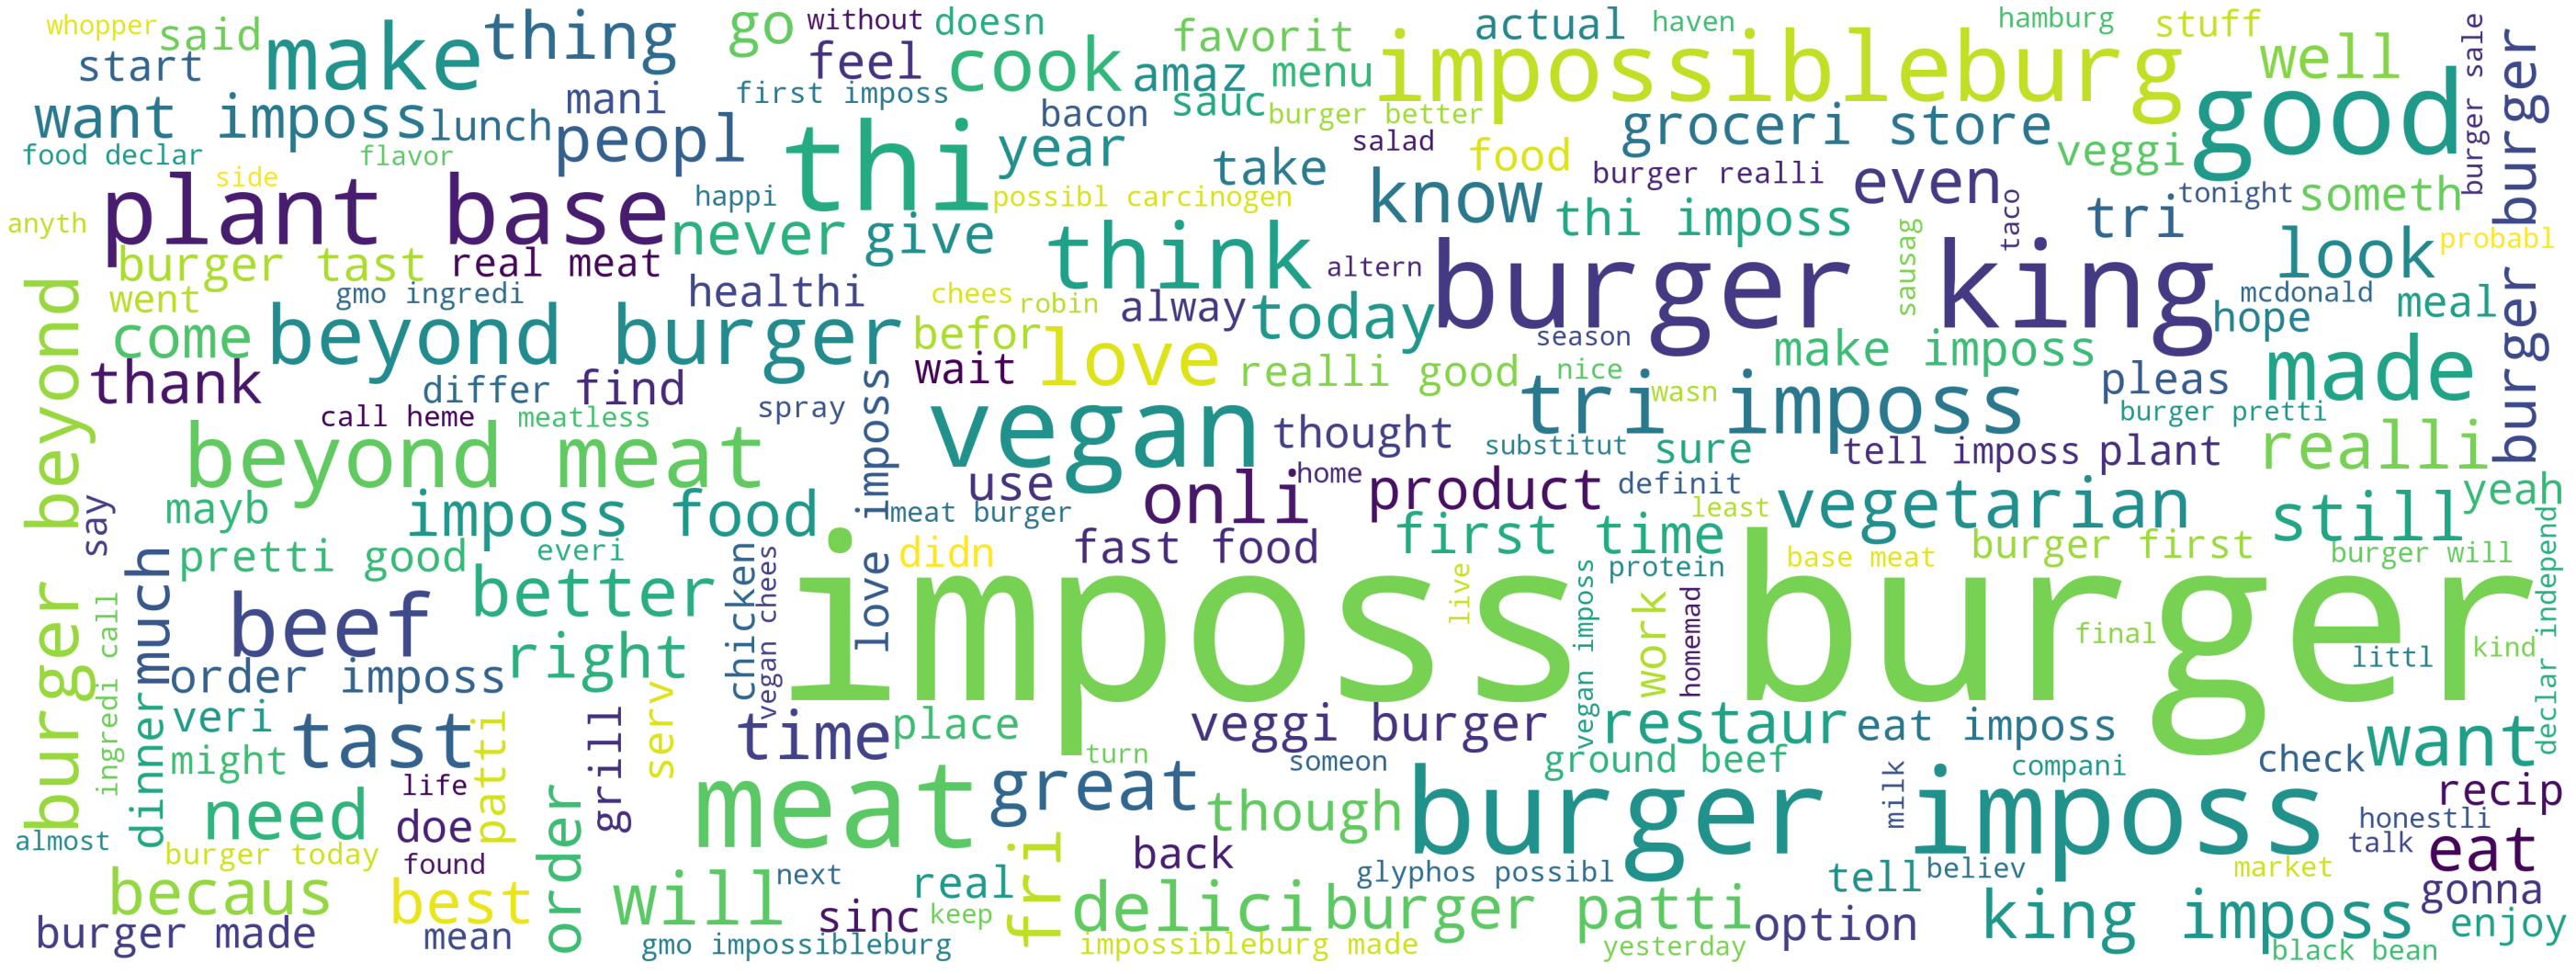

In [58]:
plt.figure(figsize=(50,50))
plt.imshow(wc_positive)
plt.axis('off')
plt.show()

In [52]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']<=0])

In [55]:
wc_negative = WordCloud(background_color='white', height=1500, width=4000).generate(all_words_negative)

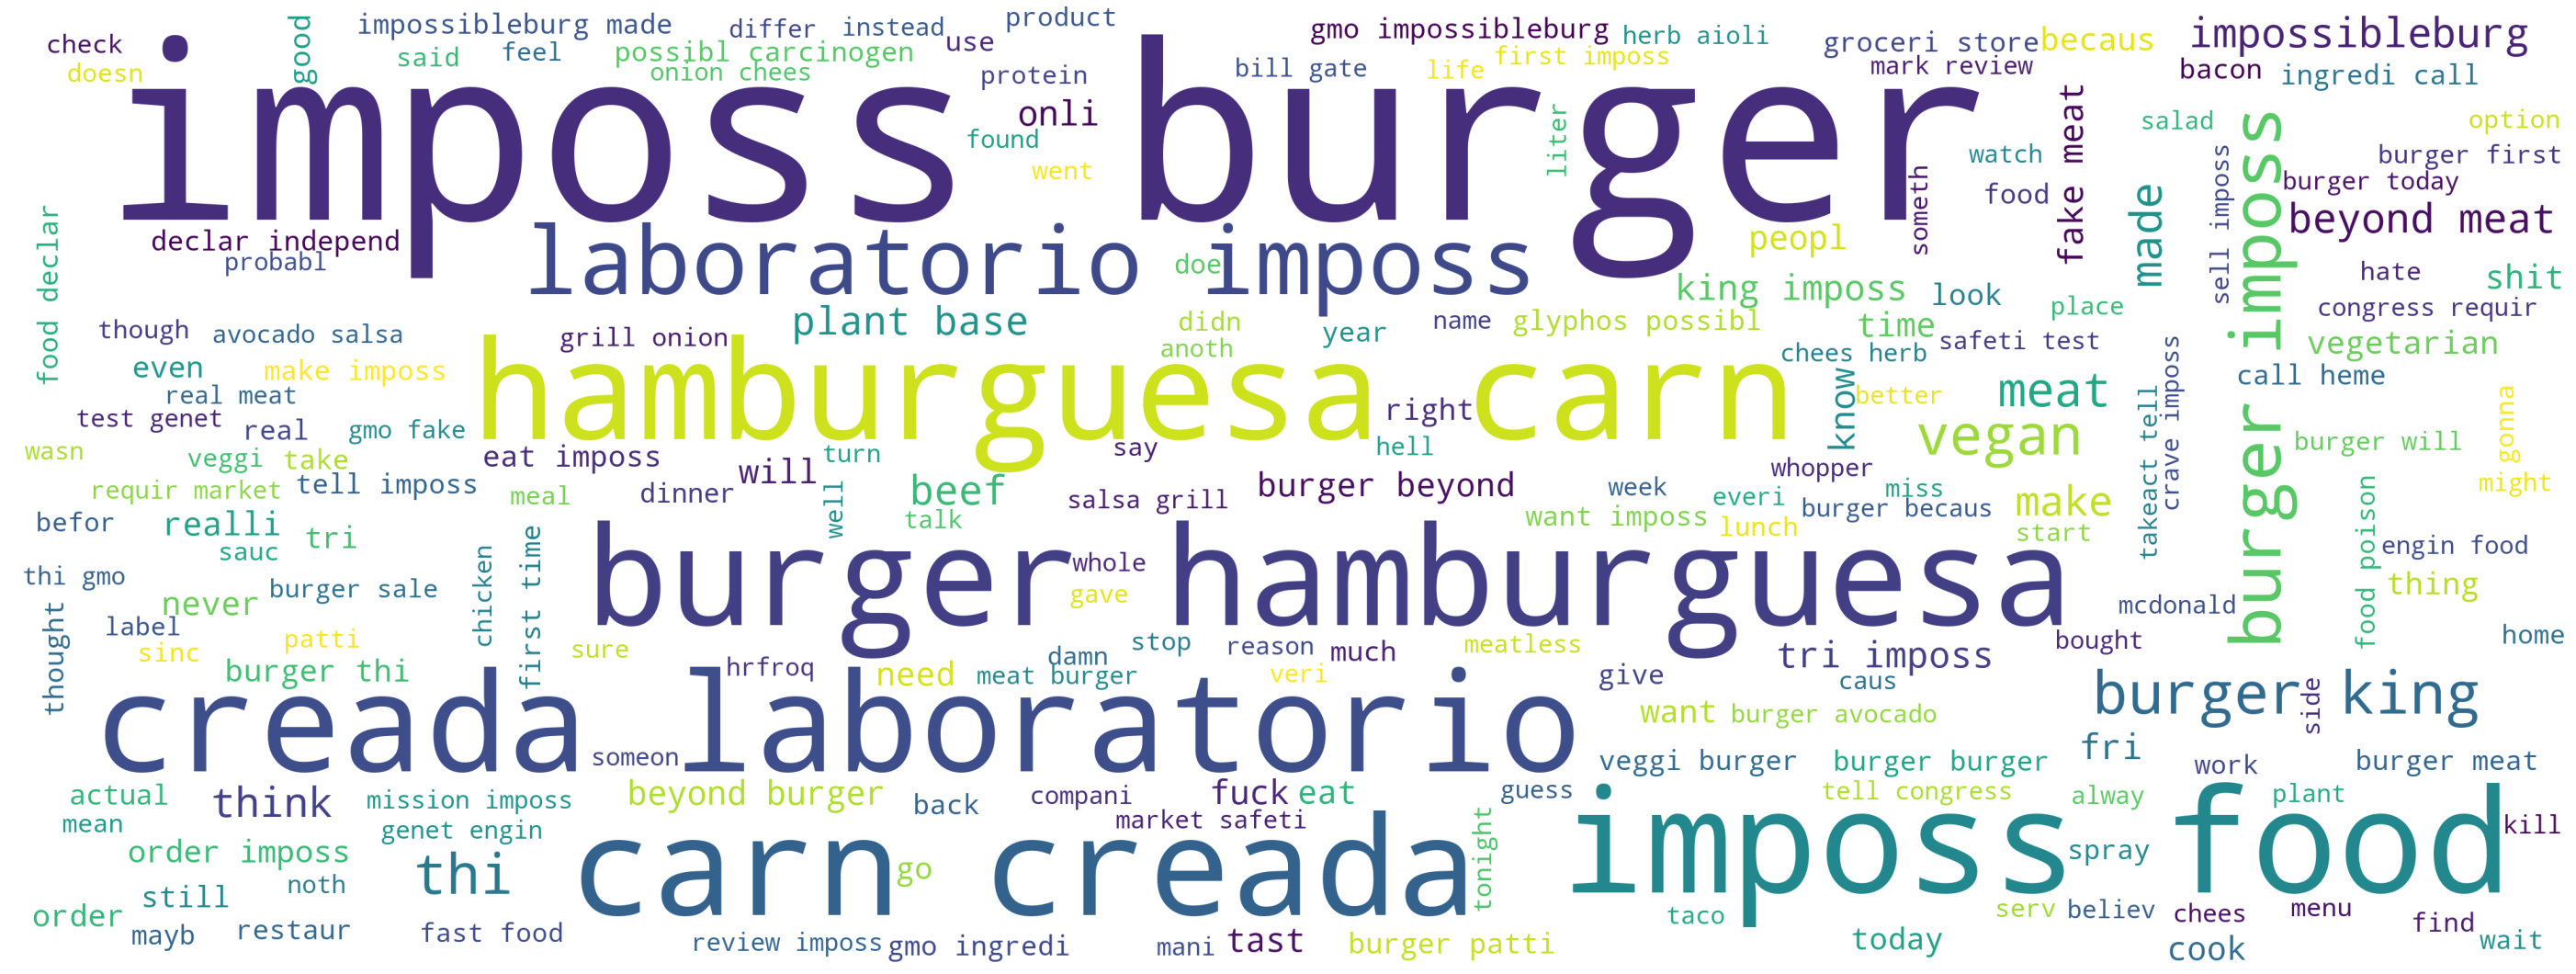

In [57]:
plt.figure(figsize=(50,50))
plt.imshow(wc_negative)
plt.axis('off')
plt.show()

In [59]:
all_words_neutral = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']==0])

In [60]:
wc_neutral = WordCloud(background_color='white', height=1500, width=4000).generate(all_words_neutral)

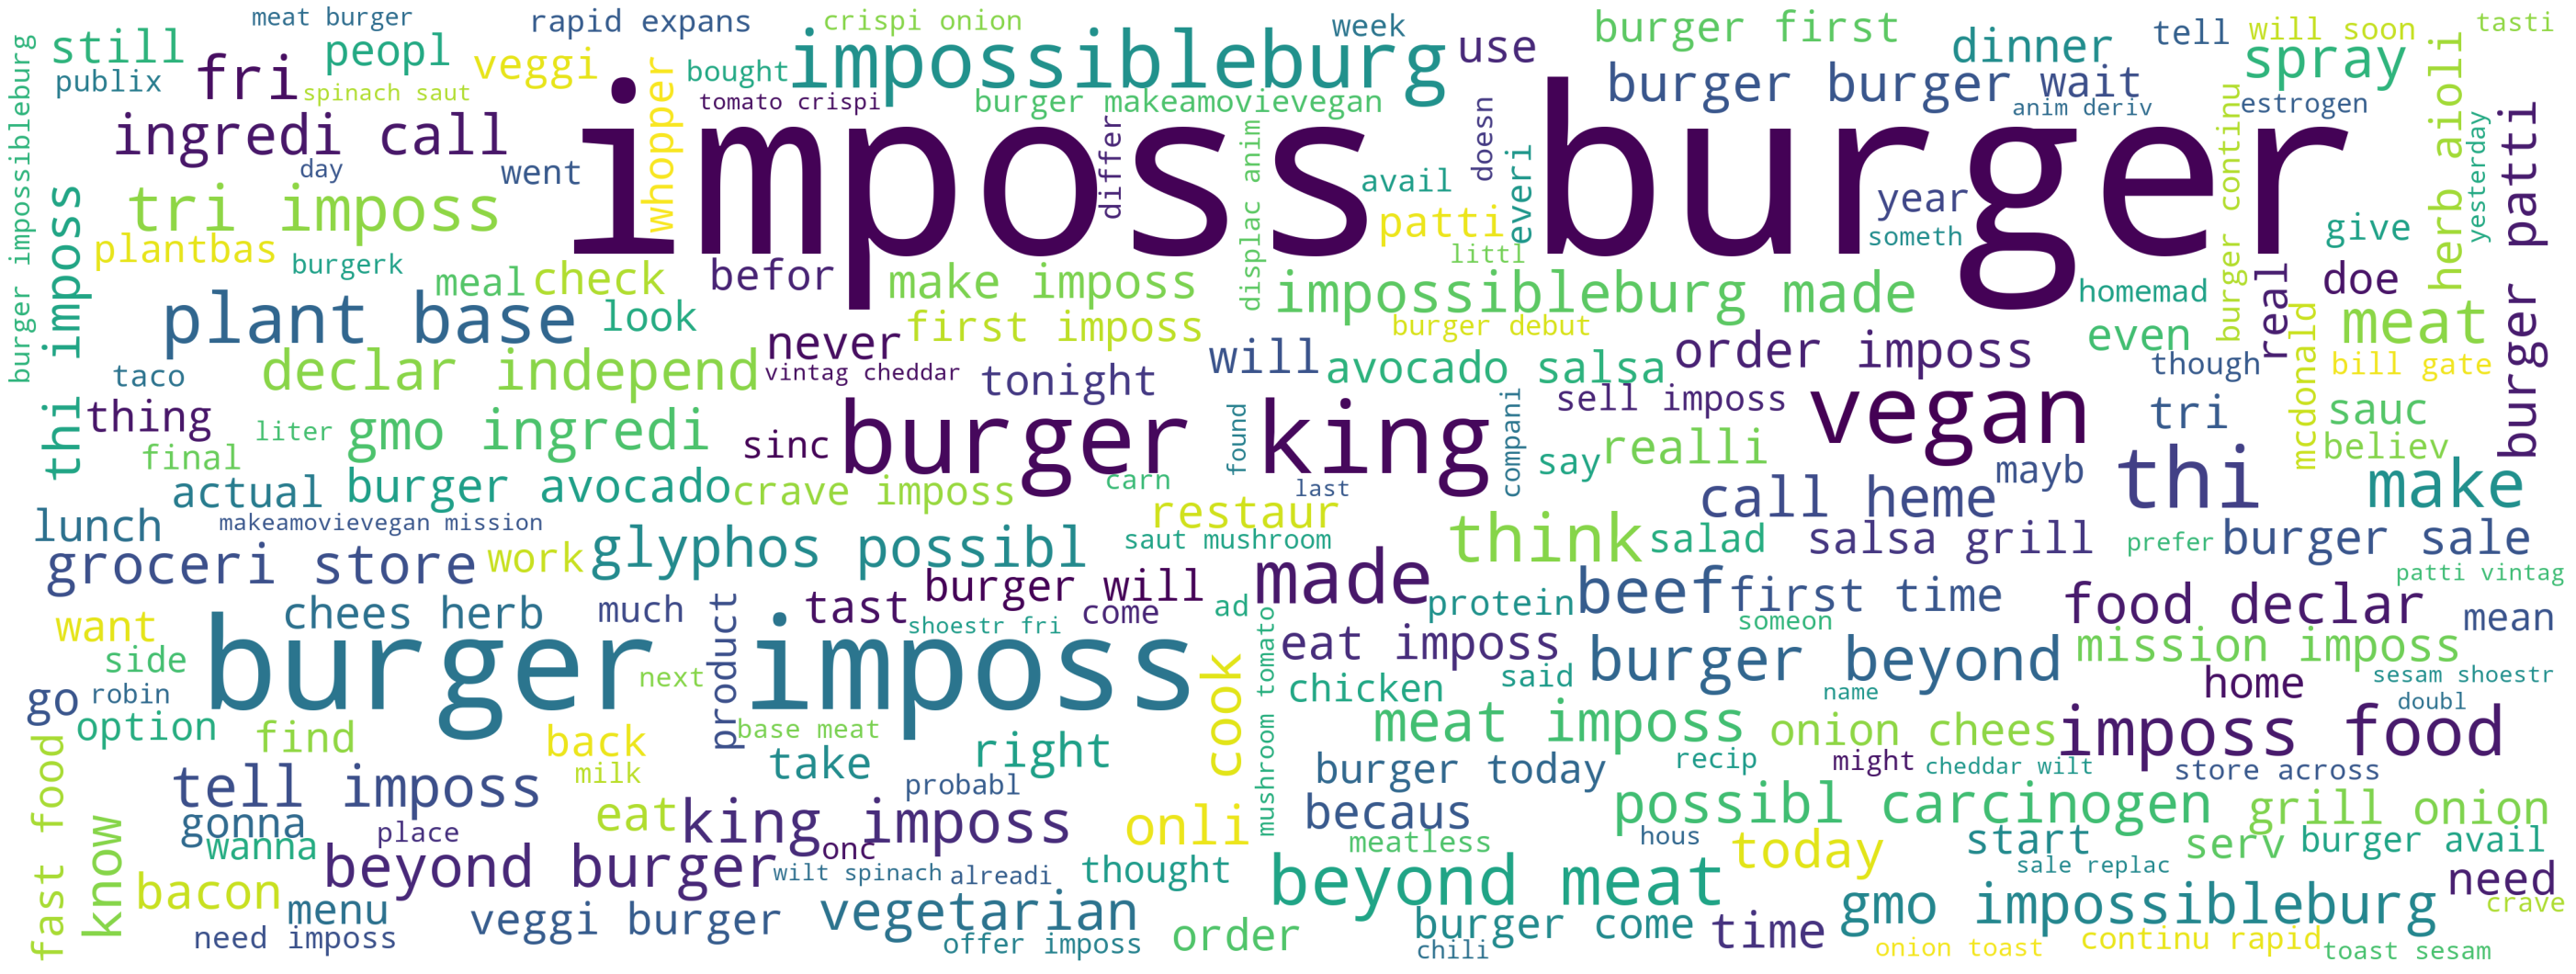

In [61]:
plt.figure(figsize=(50,50))
plt.imshow(wc_neutral)
plt.axis('off')
plt.show()

In [62]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [63]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']>=0])

In [64]:
ht_positive

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 ['mothersday', 'mybirthday'],
 [],
 [],
 [],
 [],
 ['impossibleburg', 'impossiblefood', 'meat'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg', 'beyondmeat'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['vegan',
  'meat',
  'burger',
  'innov',
  'asia',
  'veganmeat',
  'startup',
  'foodtech',
  'foodi',
  'impossibleburg',
  'plantbasedfood',
  'china',
  'meat'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['fact'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg', 'scienc'],
 ['impossibleburg', 'scienc'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['gmo', 'gmoyeast'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossiblefood',
  'plantprotein',
  'plantbas',
  'nutrit',
  'schoollunch',
  'usda',
  'foodlabel',
  'beef',
  'ubbeef'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['dyor', 'pro

In [65]:
ht_positive_unnest = sum(ht_positive,[])

In [66]:
ht_positive_unnest

['mothersday',
 'mybirthday',
 'impossibleburg',
 'impossiblefood',
 'meat',
 'impossibleburg',
 'beyondmeat',
 'vegan',
 'meat',
 'burger',
 'innov',
 'asia',
 'veganmeat',
 'startup',
 'foodtech',
 'foodi',
 'impossibleburg',
 'plantbasedfood',
 'china',
 'meat',
 'fact',
 'impossibleburg',
 'scienc',
 'impossibleburg',
 'scienc',
 'gmo',
 'gmoyeast',
 'impossiblefood',
 'plantprotein',
 'plantbas',
 'nutrit',
 'schoollunch',
 'usda',
 'foodlabel',
 'beef',
 'ubbeef',
 'dyor',
 'profitsoverpeopl',
 'wearenotdispos',
 'youfirst',
 'impossibleburg',
 'impossiblefood',
 'grill',
 'trysometh',
 'impossibleburg',
 'detroitisit',
 'detroit',
 'impossibleburg',
 'drivethru',
 'fastfood',
 'whitecastl',
 'gameboy',
 'gameboycamera',
 'nintendo',
 'videogam',
 'game',
 'retro',
 'retrogam',
 'impossibleburg',
 'cheesecakefactori',
 'burger',
 'food',
 'bnw',
 'thesimpson',
 'impossibleburg',
 'beyondburg',
 'giveaway',
 'impossibleburg',
 'vegan',
 'school',
 'plantbas',
 'actionontox',
 'cuc

In [68]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']<=0])

In [69]:
ht_negative

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg', 'beyondmeat'],
 [],
 [],
 [],
 [],
 ['billgat', 'impossibleburg'],
 [],
 ['energypoverti', 'regress'],
 [],
 [],
 [],
 [],
 [],
 ['vegan',
  'meat',
  'burger',
  'innov',
  'asia',
  'veganmeat',
  'startup',
  'foodtech',
  'foodi',
  'impossibleburg',
  'plantbasedfood',
  'china',
  'meat'],
 [],
 [],
 [],
 [],
 [],
 ['fact'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg', 'beyondburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [

In [70]:
ht_negative_unnest = sum(ht_negative,[])

In [71]:
ht_negative_unnest

['impossibleburg',
 'beyondmeat',
 'billgat',
 'impossibleburg',
 'energypoverti',
 'regress',
 'vegan',
 'meat',
 'burger',
 'innov',
 'asia',
 'veganmeat',
 'startup',
 'foodtech',
 'foodi',
 'impossibleburg',
 'plantbasedfood',
 'china',
 'meat',
 'fact',
 'impossibleburg',
 'beyondburg',
 'impossibleburg',
 'food',
 'foodreview',
 'enjoy',
 'impossibleburg',
 'burgerk',
 'burgerkingreview',
 'burgerkingimpossiblewhopp',
 'burgerkingimpossiblewhopperreview',
 'burger',
 'imposs',
 'whopper',
 'impossiblewhopp',
 'impossiblewhopperreview',
 'fred',
 'nytlett',
 'nytlett',
 'eatinganimalscausespandem',
 'impossibleburg',
 'impossibleburg',
 'burger',
 'impossiblefood',
 'jimmi',
 'goirish',
 'respect',
 'impossibleburg',
 'imposs',
 'cholesterolfre',
 'impossibleisnoth',
 'orlando',
 'mediapreview',
 'twitterversari',
 'tuckercarlsonmustgo',
 'impossibleburg',
 'dontjudgem',
 'impossibleburg',
 'vegan',
 'impossibleburg',
 'sesamestreet',
 'plantbas',
 'impossibleburg',
 'burgerk',
 '

In [72]:
ht_neutral = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']==0])

In [73]:
ht_neutral

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg', 'beyondmeat'],
 [],
 [],
 [],
 [],
 [],
 ['vegan',
  'meat',
  'burger',
  'innov',
  'asia',
  'veganmeat',
  'startup',
  'foodtech',
  'foodi',
  'impossibleburg',
  'plantbasedfood',
  'china',
  'meat'],
 [],
 [],
 [],
 [],
 ['fact'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg', 'beyondburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['impossibleburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['food',
  'foodreview',
  'enjoy',
  'impossibleburg',
  'burgerk',
  'burgerkingreview',
  'burgerkingimpossiblewhopp',
  'burgerkingimpossiblewhopperreview',
  'burger',
  'imposs',
  'whopper',
  'impossiblewhopp',
  'impossiblewhopperreview'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [74]:
ht_neutral_unnest = sum(ht_neutral,[])

In [75]:
ht_neutral_unnest

['impossibleburg',
 'beyondmeat',
 'vegan',
 'meat',
 'burger',
 'innov',
 'asia',
 'veganmeat',
 'startup',
 'foodtech',
 'foodi',
 'impossibleburg',
 'plantbasedfood',
 'china',
 'meat',
 'fact',
 'impossibleburg',
 'beyondburg',
 'impossibleburg',
 'food',
 'foodreview',
 'enjoy',
 'impossibleburg',
 'burgerk',
 'burgerkingreview',
 'burgerkingimpossiblewhopp',
 'burgerkingimpossiblewhopperreview',
 'burger',
 'imposs',
 'whopper',
 'impossiblewhopp',
 'impossiblewhopperreview',
 'impossibleburg',
 'burger',
 'impossiblefood',
 'jimmi',
 'goirish',
 'respect',
 'impossibleisnoth',
 'dontjudgem',
 'impossibleburg',
 'vegan',
 'impossibleburg',
 'impossibleburg',
 'impossibleburg',
 'justegg',
 'goodcatch',
 'msg',
 'dinner',
 'impossibleburg',
 'health',
 'grubhubaward',
 'eatbeef',
 'bidenburg',
 'burgatori',
 'impossibleburg',
 'bidenburg',
 'catitstu',
 'comic',
 'comic',
 'cartoon',
 'cartoon',
 'cartoon',
 'onepanelcom',
 'onepanel',
 'meanwhil',
 'vegan',
 'veganmeat',
 'imposs

In [76]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [77]:
word_freq_positive

FreqDist({'impossibleburg': 1676, 'gmo': 346, 'vegan': 335, 'plantbas': 247, 'burger': 183, 'glyphos': 163, 'vegetarian': 124, 'imposs': 97, 'impossiblefood': 96, 'beyondmeat': 80, ...})

In [78]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [79]:
df_positive

Hashtags  Count
0         mothersday      1
1         mybirthday      1
2     impossibleburg   1676
3     impossiblefood     96
4               meat     39
...              ...    ...
3131      omahapizza      1
3132  drivethrupizza      1
3133  pizzadrivethru      1
3134        huntsvil      1
3135            bama      1

[3136 rows x 2 columns]

In [80]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

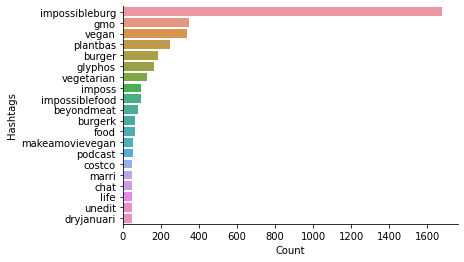

In [81]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [82]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [83]:
word_freq_negative

FreqDist({'impossibleburg': 1026, 'gmo': 446, 'vegan': 209, 'plantbas': 163, 'glyphos': 162, 'burger': 88, 'vegetarian': 79, 'impossiblefood': 74, 'makeamovievegan': 57, 'beyondmeat': 49, ...})

In [84]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [85]:
df_negative

Hashtags  Count
0     impossibleburg   1026
1         beyondmeat     49
2            billgat      7
3      energypoverti      1
4            regress      1
...              ...    ...
2149       cocoabutt      1
2150            iron      1
2151           blood      1
2152        huntsvil      1
2153            bama      1

[2154 rows x 2 columns]

In [86]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

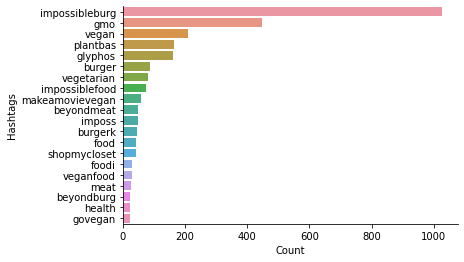

In [87]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [88]:
word_freq_neutral = nltk.FreqDist(ht_neutral_unnest)

In [89]:
word_freq_neutral

FreqDist({'impossibleburg': 804, 'gmo': 312, 'vegan': 156, 'glyphos': 153, 'plantbas': 129, 'burger': 76, 'vegetarian': 65, 'makeamovievegan': 55, 'impossiblefood': 50, 'shopmycloset': 41, ...})

In [90]:
df_neutral = pd.DataFrame({'Hashtags':list(word_freq_neutral.keys()),'Count':list(word_freq_neutral.values())})

In [91]:
df_neutral

Hashtags  Count
0     impossibleburg    804
1         beyondmeat     35
2              vegan    156
3               meat     19
4             burger     76
...              ...    ...
1711      livekindli      1
1712            well      1
1713    burgerfriday      1
1714        huntsvil      1
1715            bama      1

[1716 rows x 2 columns]

In [92]:
df_neutral_plot = df_neutral.nlargest(20,columns='Count')

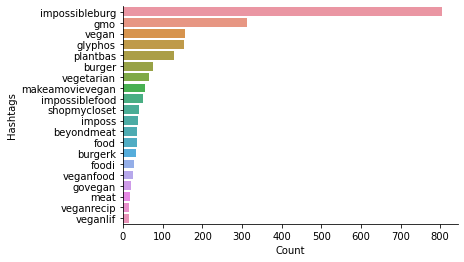

In [93]:
sns.barplot(data=df_neutral_plot,y='Hashtags',x='Count')
sns.despine()